In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [3]:
sc._settings.ScanpyConfig.n_jobs = -1

In [2]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [3]:
be_tonsil = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/BA_CODEX/quantification/BE_tonsil/BE_Tonsil_l3_dryad.csv')

In [4]:
training = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/BA_CODEX/quantification/tonsil_training/B004_training_dryad.csv')

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_11364/373339322.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  training = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/BA_CODEX/quantification/tonsil_training/B004_training_dryad.csv')


In [5]:
be_tonsil.columns

Index(['Unnamed: 0', 'CHGA', 'PDL1', 'CD56', 'CK7', 'FoxP3', 'CD21', 'MUC1',
       'PD1', 'CD11b', 'CD4', 'CD31', 'CD25', 'CD15', 'CD20', 'Annexin A1',
       'aSMA', 'CD11c', 'Nestin', 'IDO', 'Cytokeratin', 'MUC5AC', 'Vimentin',
       'CD36', 'HLADR', 'BCL2', 'p63', 'CD3', 'CD45', 'CD8', 'CD57',
       'aDefensin5', 'CD68', 'CD34', 'CD38', 'Podoplanin', 'CD163', 'Bcatenin',
       'CD138', 'Arginase1', 'CD73', 'CD206', 'MUC6', 'COX2', 'MMP9', 'x', 'y',
       'sample_name', 'cell_type'],
      dtype='object')

In [6]:
training.columns

Index(['Unnamed: 0', 'MUC2', 'SOX9', 'MUC1', 'CD31', 'Synapto', 'CD49f',
       'CD15', 'CHGA', 'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin', 'HLADR',
       'CD8', 'CD11c', 'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38', 'CD90',
       'aSMA', 'CD21', 'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68', 'CD34',
       'aDef5', 'CD7', 'CD36', 'CD138', 'CD45RO', 'Cytokeratin', 'CK7',
       'CD117', 'CD19', 'Podoplanin', 'CD45', 'CD56', 'CD69', 'Ki67', 'CD49a',
       'CD163', 'CD161', 'x', 'y', 'tissue', 'cell_type_A', 'donor',
       'unique_region'],
      dtype='object')

In [29]:
be_tonsil.drop(columns=['Unnamed: 0'], inplace=True)

In [30]:
be_tonsil

,CHGA,PDL1,CD56,CK7,FoxP3,CD21,MUC1,PD1,CD11b,CD4,...,Arginase1,CD73,CD206,MUC6,COX2,MMP9,x,y,sample_name,cell_type
0,-0.015838,-0.262392,-0.328807,-0.030104,-0.169786,-0.195315,-0.144450,-0.314147,-0.306023,-0.681588,...,0.183429,-0.471492,0.368175,-0.137850,0.148542,-0.161118,394.0,3516.0,tonsil,Innate
1,-0.063117,-0.075990,1.852914,-0.030104,-0.169786,2.408519,-0.144450,1.413897,1.150271,-0.499367,...,3.152803,-0.460310,0.406059,0.247144,0.549028,-0.114117,5469.0,2463.0,tonsil,Innate
2,-0.070705,-0.262392,-0.362758,-0.030104,-0.169786,0.281066,-0.144449,-0.270863,-0.306020,-0.681588,...,-0.300006,0.798789,-0.238657,-0.137942,-0.167777,-0.161118,2506.0,4793.0,tonsil,PDPN
3,-0.061208,-0.186271,-0.074156,-0.030104,-0.169786,-0.078391,-0.144447,-0.088802,0.294455,-0.681588,...,1.068848,-0.256614,-0.230057,-0.130576,-0.069935,-0.161118,8933.0,796.0,tonsil,Endothelial
4,-0.070660,-0.123091,0.006811,-0.030104,0.100844,0.054867,-0.144450,-0.046886,2.337389,-0.588588,...,3.108413,-0.451207,-0.165934,-0.126458,0.048613,-0.153662,4793.0,1885.0,tonsil,Innate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219921,-0.070250,-0.262392,0.637652,-0.030104,-0.169786,-0.174148,-0.144450,0.044370,-0.306023,-0.572092,...,-0.263463,-0.367291,-0.110060,-0.137930,-0.096468,-0.161118,4373.0,1739.0,Barretts Esophagus,Innate
219922,-0.058163,-0.160154,0.202644,-0.030104,-0.169786,-0.219187,-0.144450,-0.201268,-0.306023,-0.619760,...,-0.193195,0.916953,3.677105,-0.137942,-0.163933,-0.161118,4831.0,2782.0,Barretts Esophagus,Innate
219923,-0.067054,-0.214624,0.057478,-0.004263,-0.166512,-0.155890,0.100125,-0.122829,-0.301920,-0.255616,...,-0.041300,-0.163893,-0.192927,-0.072235,-0.137067,-0.140883,1592.0,8542.0,Barretts Esophagus,Innate
219924,-0.013725,-0.138051,-0.057624,-0.030104,-0.169778,-0.309653,-0.121936,-0.334723,-0.306023,0.712992,...,-0.651138,-0.471492,-0.249438,-0.137942,-0.171432,-0.161118,3236.0,238.0,Barretts Esophagus,Innate


In [31]:
training

,Unnamed: 0,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,...,Ki67,CD49a,CD163,CD161,x,y,tissue,cell_type_A,donor,unique_region
0,0,-0.241565,0.538240,-0.145700,-0.254499,-0.312923,-0.440809,-0.083480,-0.073498,-0.182247,...,-0.270736,-0.574298,-0.274995,-0.083926,1253.0,886.0,SB,Enterocyte,B004,reg001_SB_B004
1,1,-0.231567,1.053268,0.015944,-0.248268,-0.314157,0.461514,-0.094145,-0.087275,0.246550,...,0.161482,-0.484751,-0.265804,-0.052165,1259.0,874.0,SB,Enterocyte,B004,reg001_SB_B004
2,4,0.207531,0.526999,-0.057481,-0.249034,-0.325943,0.033951,-0.094142,-0.086326,-0.005325,...,0.360991,-0.517455,-0.274345,-0.062414,1287.0,845.0,SB,Enterocyte,B004,reg001_SB_B004
3,5,-0.076672,-0.420316,-0.051284,-0.252876,-0.302395,1.100307,-0.093069,-0.081959,0.005021,...,0.137150,-0.460114,-0.274582,-0.063367,1294.0,964.0,SB,Enterocyte,B004,reg001_SB_B004
4,6,-0.235334,0.376148,0.025601,-0.251348,-0.316774,-0.074358,-0.094141,-0.080630,-0.029893,...,-0.041417,-0.519680,-0.273687,-0.047192,1307.0,841.0,SB,Enterocyte,B004,reg001_SB_B004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248280,177579-2,-0.301417,-0.480617,-0.485732,-0.247548,-0.075596,-0.601329,-0.296372,-0.121456,-0.298825,...,-0.275793,-0.448915,-0.329448,-0.110390,8672.0,7054.0,CL,Plasma,B004,reg004_CL_B004
248281,177580-2,-0.302128,-0.469591,-0.486481,-0.201661,-0.252108,-0.632735,-0.291958,-0.089449,-0.345515,...,-0.298807,-0.648830,-0.263899,-0.104248,8727.0,6182.0,CL,Plasma,B004,reg004_CL_B004
248282,177666-2,-0.300624,-0.505039,-0.481408,-0.206155,-0.257355,-0.611439,-0.297305,-0.096474,-0.338581,...,-0.290010,-0.616562,-0.280333,-0.082285,9031.0,6452.0,CL,Plasma,B004,reg004_CL_B004
248283,177675-2,-0.241006,-0.217832,-0.350860,-0.235930,0.407688,-0.585294,-0.297135,-0.069509,-0.099756,...,0.012376,-0.387270,-0.120730,-0.058423,8335.0,7248.0,CL,Plasma,B004,reg004_CL_B004


In [14]:
training['tissue'].unique()

array(['SB', 'CL'], dtype=object)

In [32]:
training.drop(columns=['Unnamed: 0'], inplace=True)
training.rename(columns={'cell_type_A': 'cell_type'}, inplace=True)
training = reorder_columns(training, 'cell_type', 'unique_region')

In [36]:
training

,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,ITLN1,...,Ki67,CD49a,CD163,CD161,x,y,tissue,donor,unique_region,cell_type
0,-0.241565,0.538240,-0.145700,-0.254499,-0.312923,-0.440809,-0.083480,-0.073498,-0.182247,-0.395115,...,-0.270736,-0.574298,-0.274995,-0.083926,1253.0,886.0,SB,B004,reg001_SB_B004,Enterocyte
1,-0.231567,1.053268,0.015944,-0.248268,-0.314157,0.461514,-0.094145,-0.087275,0.246550,-0.292916,...,0.161482,-0.484751,-0.265804,-0.052165,1259.0,874.0,SB,B004,reg001_SB_B004,Enterocyte
2,0.207531,0.526999,-0.057481,-0.249034,-0.325943,0.033951,-0.094142,-0.086326,-0.005325,-0.288484,...,0.360991,-0.517455,-0.274345,-0.062414,1287.0,845.0,SB,B004,reg001_SB_B004,Enterocyte
3,-0.076672,-0.420316,-0.051284,-0.252876,-0.302395,1.100307,-0.093069,-0.081959,0.005021,-0.355146,...,0.137150,-0.460114,-0.274582,-0.063367,1294.0,964.0,SB,B004,reg001_SB_B004,Enterocyte
4,-0.235334,0.376148,0.025601,-0.251348,-0.316774,-0.074358,-0.094141,-0.080630,-0.029893,-0.342737,...,-0.041417,-0.519680,-0.273687,-0.047192,1307.0,841.0,SB,B004,reg001_SB_B004,Enterocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248280,-0.301417,-0.480617,-0.485732,-0.247548,-0.075596,-0.601329,-0.296372,-0.121456,-0.298825,-0.407754,...,-0.275793,-0.448915,-0.329448,-0.110390,8672.0,7054.0,CL,B004,reg004_CL_B004,Plasma
248281,-0.302128,-0.469591,-0.486481,-0.201661,-0.252108,-0.632735,-0.291958,-0.089449,-0.345515,-0.399732,...,-0.298807,-0.648830,-0.263899,-0.104248,8727.0,6182.0,CL,B004,reg004_CL_B004,Plasma
248282,-0.300624,-0.505039,-0.481408,-0.206155,-0.257355,-0.611439,-0.297305,-0.096474,-0.338581,-0.430508,...,-0.290010,-0.616562,-0.280333,-0.082285,9031.0,6452.0,CL,B004,reg004_CL_B004,Plasma
248283,-0.241006,-0.217832,-0.350860,-0.235930,0.407688,-0.585294,-0.297135,-0.069509,-0.099756,-0.256268,...,0.012376,-0.387270,-0.120730,-0.058423,8335.0,7248.0,CL,B004,reg004_CL_B004,Plasma


In [35]:
be_tonsil.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/BA_CODEX/quantification/BE_tonsil/processed/BE_Tonsil_l3_dryad_cleaned.csv', index=False)
training.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/BA_CODEX/quantification/tonsil_training/processed//B004_training_dryad_cleaned.csv', index=False)

In [30]:
X_columns_be_tonsil = be_tonsil.columns[:be_tonsil.columns.get_loc('sample_name')]
obs_columns_be_tonsil = be_tonsil.columns[be_tonsil.columns.get_loc('sample_name'):]
adata_be_tonsil = ad.AnnData(
    X=be_tonsil[X_columns_be_tonsil],
    obs=be_tonsil[obs_columns_be_tonsil],
    var=pd.DataFrame(index=X_columns_be_tonsil)
)

X_columns_training = training.columns[:training.columns.get_loc('unique_region')]
obs_columns_training = training.columns[training.columns.get_loc('unique_region'):]
adata_training = ad.AnnData(
    X=training[X_columns_training],
    obs=training[obs_columns_training],
    var=pd.DataFrame(index=X_columns_training)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [34]:
adata_list = [adata_be_tonsil, adata_training]

In [32]:
adata_be_tonsil.X.max()

139.72675

In [35]:
for adata in adata_list:
    adata.raw = adata
    adata.X = np.arcsinh(adata.X / 5)
    adata.layers['zscore'] = z_score_normalization(adata.X)

In [25]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


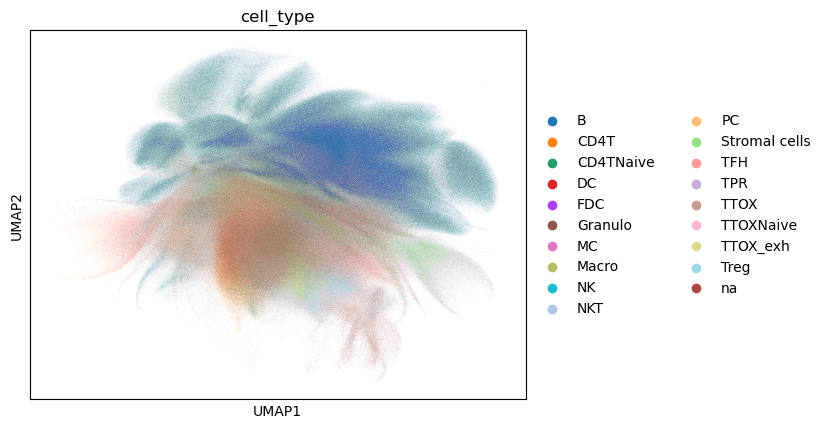

In [18]:
sc.pl.umap(adata, color='cell_type')

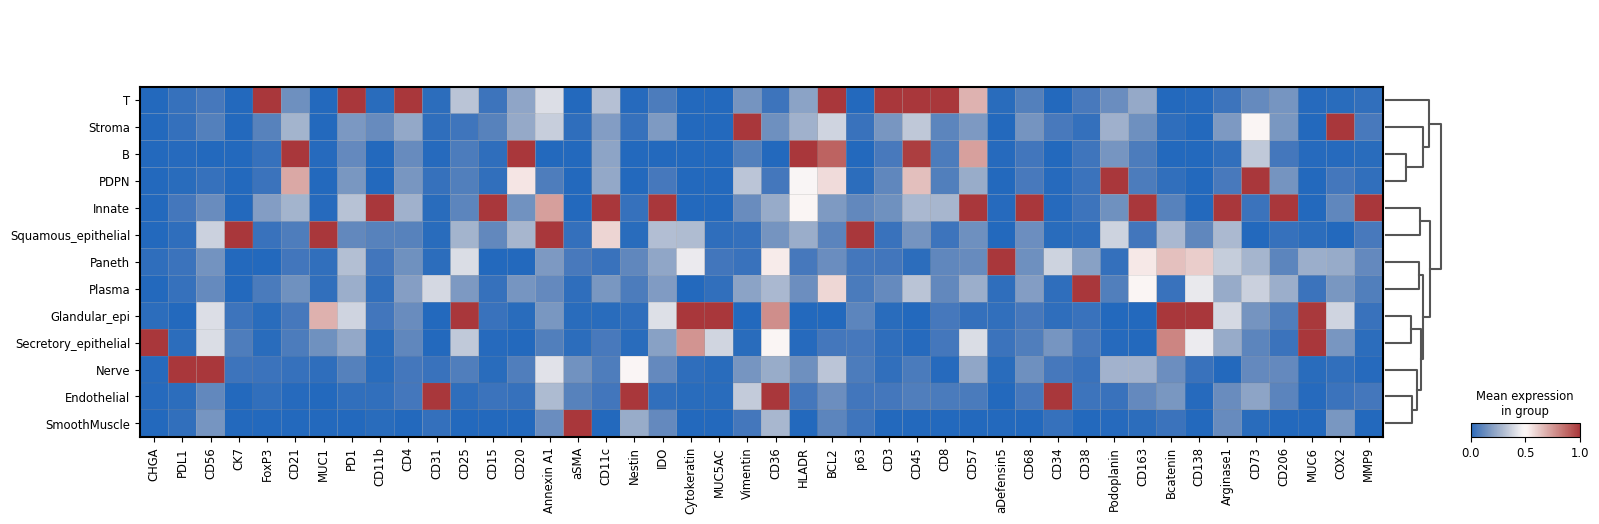

In [37]:
sc.pl.matrixplot(adata_be_tonsil, var_names=adata_be_tonsil.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

THis is a very broad phenotyping, more like a lineage classification. CD138 in GLandular epithelium? Nerve?

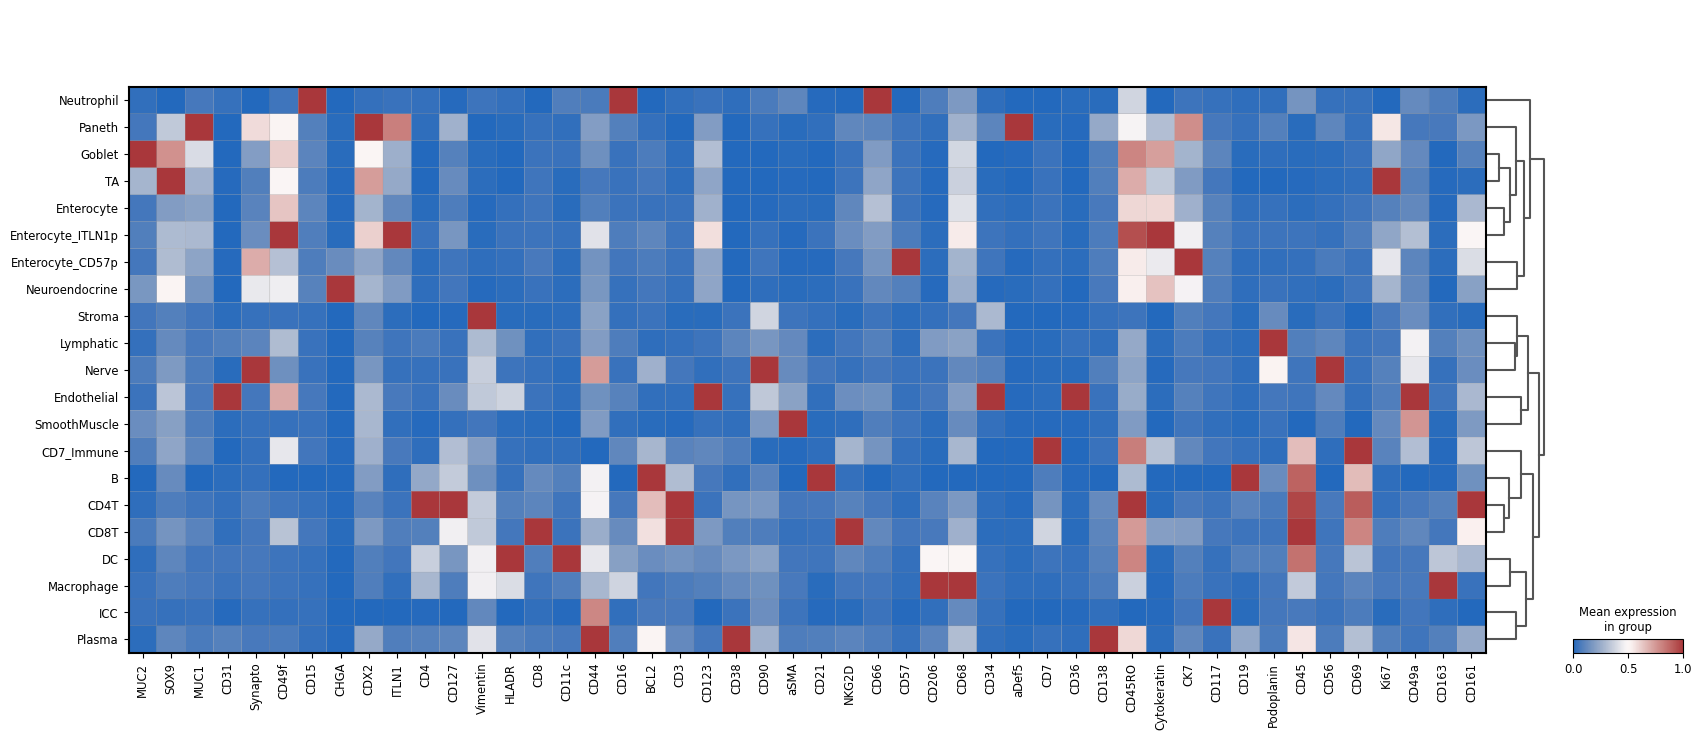

In [41]:
sc.pl.matrixplot(adata_training, var_names=adata_training.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

Looks very clean

In [42]:
sc.tl.rank_genes_groups(adata_training, groupby='cell_type' , method='wilcoxon')
sc.tl.filter_rank_genes_groups(adata_training, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_

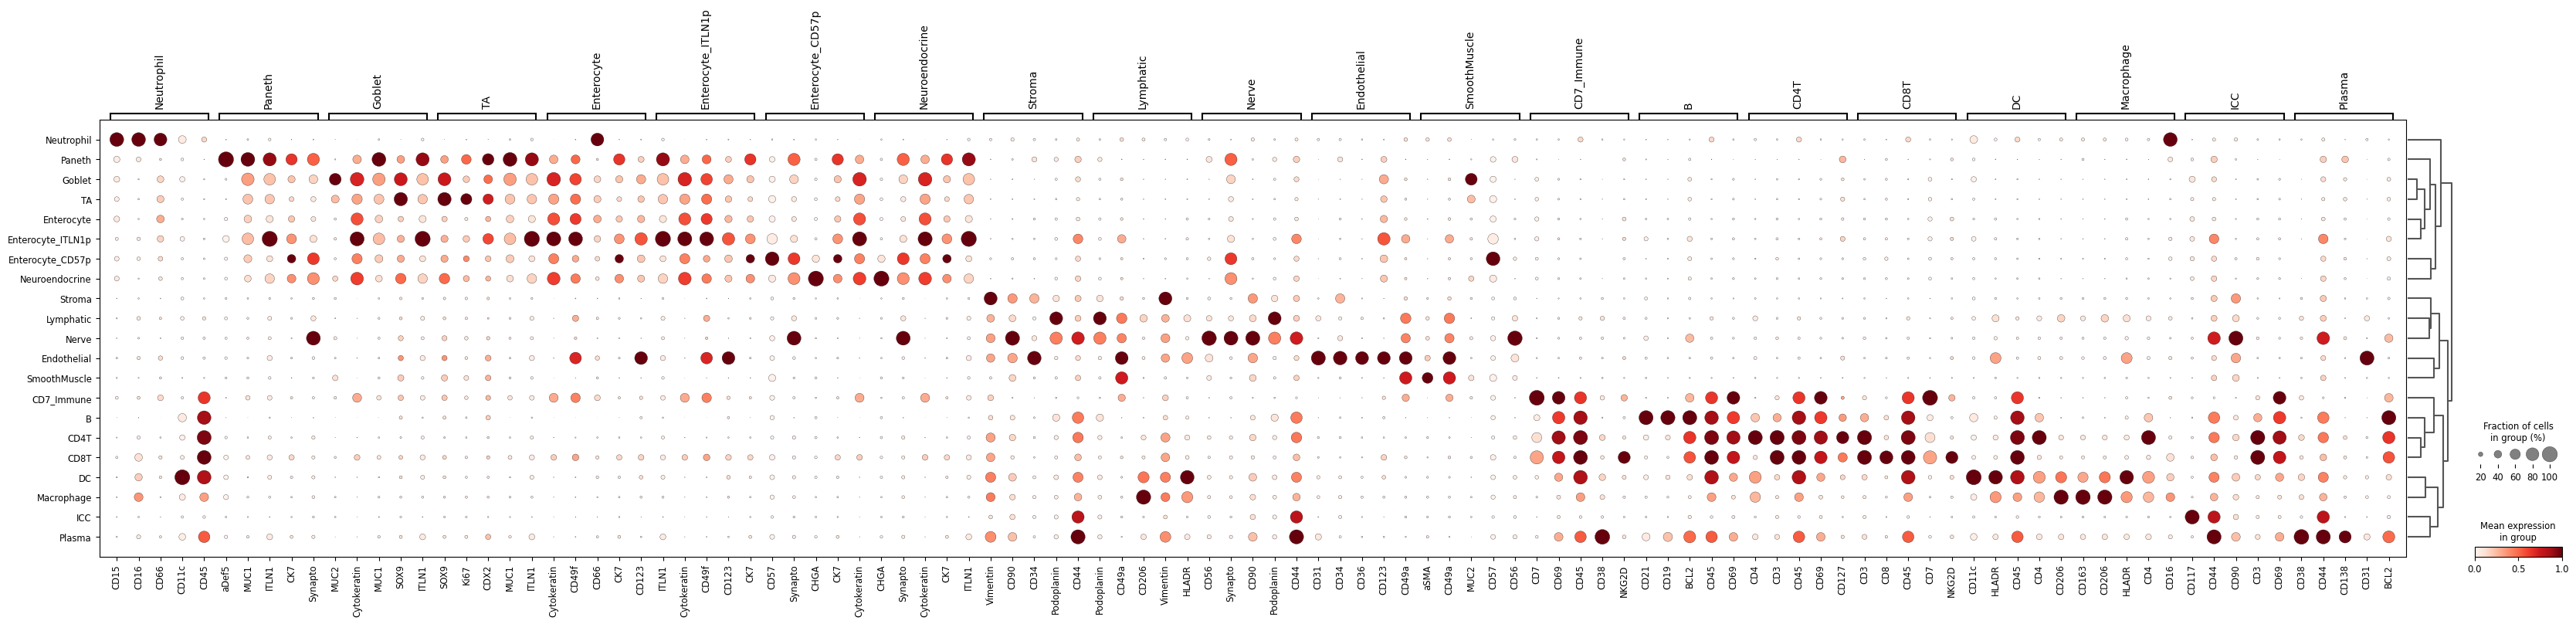

In [43]:
sc.pl.rank_genes_groups_dotplot(adata_training, n_genes=5, standard_scale='var', key='rank_genes_groups')

categories: B, CD4T, CD7_Immune, etc.
var_group_labels: 


ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (0,)

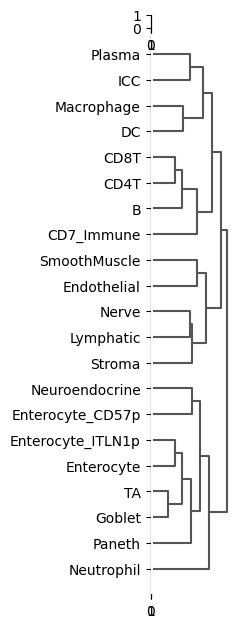

In [44]:
sc.pl.rank_genes_groups_dotplot(adata_training, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')